## **Import Library**
Import fungsi yang dibutuhkan dari library yang ada

In [ ]:
import os
import tensorflow as tf
from google.colab import files
import shutil
import pandas as pd
import random
import matplotlib.pyplot as plt
from PIL import Image as PILImage
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import urllib.request
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import warnings
from IPython.display import Image
from graphviz import Digraph

In [ ]:
print(tf.__version__)

2.18.0


In [ ]:
import sys

print("Python version:", sys.version)
print("-" * 30)

# List of libraries to check versions for (based on your imports)
libraries_to_check = [
    'tensorflow',
    'pandas',
    'numpy',
    'PIL', # Pillow library is imported as PIL
    'sklearn', # scikit-learn
    'seaborn',
    'tqdm',
    'flatbuffers', # Check if this has __version__
    'tflite_support', # Check if this has __version__
    'graphviz'
]

for lib_name in libraries_to_check:
    try:
        # Access the module by name
        module = sys.modules[lib_name]
        # Check if it has a __version__ attribute
        if hasattr(module, '__version__'):
            print(f"{lib_name} version: {module.__version__}")
        else:
            print(f"{lib_name}: Version information not available via __version__")
    except KeyError:
        print(f"{lib_name}: Not imported or not found in sys.modules")
    except Exception as e:
        print(f"Error checking version for {lib_name}: {e}")

# Check keras separately as it's often accessed via tensorflow.keras
try:
    # Try importing keras directly first
    import keras
    if hasattr(keras, '__version__'):
         print(f"Keras version: {keras.__version__}")
    else:
        print("Keras: Version information not available via __version__")
except ImportError:
    # If direct import fails, try accessing via tensorflow
    try:
        import tensorflow as tf
        if hasattr(tf.keras, '__version__'):
            print(f"TensorFlow Keras version: {tf.keras.__version__}")
        else:
             print("TensorFlow Keras: Version information not available via __version__")
    except Exception as e:
        print(f"Could not determine Keras version: {e}")


Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
------------------------------
tensorflow version: 2.18.0
pandas version: 2.2.2
numpy version: 2.0.2
PIL version: 11.2.1
sklearn version: 1.6.1
seaborn version: 0.13.2
tqdm version: 4.67.1
flatbuffers version: 25.2.10
tflite_support: Not imported or not found in sys.modules
graphviz version: 0.21
Keras version: 3.8.0


## Upload file menggunakan fungsi files dari google.colab

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alwinr","key":"0f82fe4887c00d912c2f74915b8af91d"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## **Pengunduhan dataset TOGA dari Kaggle**

Mengunduh dataset dari link kaggle

In [ ]:
!kaggle datasets download -d alwinr/tanaman-obat-keluarga-split

Dataset URL: https://www.kaggle.com/datasets/alwinr/tanaman-obat-keluarga-split
License(s): unknown
 99% 1.22G/1.24G [00:08<00:00, 240MB/s]
100% 1.24G/1.24G [00:10<00:00, 124MB/s]


Mengekstrak dataset yang telah diunduh ke runtime

In [ ]:
!unzip tanaman-obat-keluarga-split.zip

Archive:  tanaman-obat-keluarga-split.zip
  inflating: main/test_images/bunga kecubung/bunga kecubung-1.jpg  
  inflating: main/test_images/bunga kecubung/bunga kecubung-12.jpg  
  inflating: main/test_images/bunga kecubung/bunga kecubung-15.jpg  
  inflating: main/test_images/bunga kecubung/bunga kecubung-16.jpg  
  inflating: main/test_images/bunga kecubung/bunga kecubung-2.jpg  
  inflating: main/test_images/bunga kecubung/bunga kecubung-24.jpeg  
  inflating: main/test_images/bunga kecubung/bunga kecubung-26.jpg  
  inflating: main/test_images/bunga kecubung/bunga kecubung-31.jpeg  
  inflating: main/test_images/bunga kecubung/bunga kecubung-38.jpg  
  inflating: main/test_images/bunga kecubung/bunga kecubung-55.jpeg  
  inflating: main/test_images/bunga kecubung/bunga kecubung-62.jpeg  
  inflating: main/test_images/bunga kecubung/bunga kecubung-71.jpeg  
  inflating: main/test_images/bunga kecubung/bunga kecubung-8.jpg  
  inflating: main/test_images/bunga kecubung/bunga kecubung

Menampilkan file yang terdapat di runtime, untuk mengecek apakah dataset dari kaggle telah terdownload dan melihat nama file yang terdownload.




In [ ]:
print(os.getcwd())
print(os.listdir())

/content
['.config', 'main', 'tanaman-obat-keluarga-split.zip', 'kaggle.json', 'sample_data']


In [ ]:
# image_directories = [
#     '/content/citra_ta/main/train_images/bunga kecubung/',
#     '/content/citra_ta/main/train_images/bunga kembang sepatu/',
#     '/content/citra_ta/main/train_images/bunga kembang tidur/',
#     '/content/citra_ta/main/train_images/bunga kenanga/',
#     '/content/citra_ta/main/train_images/bunga mawar/',
#     '/content/citra_ta/main/train_images/bunga melati/',
#     '/content/citra_ta/main/train_images/bunga rosella/',
#     '/content/citra_ta/main/train_images/bunga tapak dara/',
#     '/content/citra_ta/main/train_images/bunga telang/',
#     '/content/citra_ta/main/train_images/daun beluntas/',
#     '/content/citra_ta/main/train_images/daun jambu biji/',
#     '/content/citra_ta/main/train_images/daun kelor/',
#     '/content/citra_ta/main/train_images/daun kemangi/',
#     '/content/citra_ta/main/train_images/daun kumis kucing/',
#     '/content/citra_ta/main/train_images/daun mint/',
#     '/content/citra_ta/main/train_images/daun pandan/',
#     '/content/citra_ta/main/train_images/daun pegagan/',
#     '/content/citra_ta/main/train_images/daun pepaya/',
#     '/content/citra_ta/main/train_images/daun sambiloto/',
#     '/content/citra_ta/main/train_images/daun seledri/',
#     '/content/citra_ta/main/train_images/daun serai/',
#     '/content/citra_ta/main/train_images/daun sirih/',
#     '/content/citra_ta/main/train_images/daun som jawa/',
#     '/content/citra_ta/main/train_images/daun teh hijau/',
#     '/content/citra_ta/main/validation_images/bunga kecubung/',
#     '/content/citra_ta/main/validation_images/bunga kembang sepatu/',
#     '/content/citra_ta/main/validation_images/bunga kembang tidur/',
#     '/content/citra_ta/main/validation_images/bunga kenanga/',
#     '/content/citra_ta/main/validation_images/bunga mawar/',
#     '/content/citra_ta/main/validation_images/bunga melati/',
#     '/content/citra_ta/main/validation_images/bunga rosella/',
#     '/content/citra_ta/main/validation_images/bunga tapak dara/',
#     '/content/citra_ta/main/validation_images/bunga telang/',
#     '/content/citra_ta/main/validation_images/daun beluntas/',
#     '/content/citra_ta/main/validation_images/daun jambu biji/',
#     '/content/citra_ta/main/validation_images/daun kelor/',
#     '/content/citra_ta/main/validation_images/daun kemangi/',
#     '/content/citra_ta/main/validation_images/daun kumis kucing/',
#     '/content/citra_ta/main/validation_images/daun mint/',
#     '/content/citra_ta/main/validation_images/daun pandan/',
#     '/content/citra_ta/main/validation_images/daun pegagan/',
#     '/content/citra_ta/main/validation_images/daun pepaya/',
#     '/content/citra_ta/main/validation_images/daun sambiloto/',
#     '/content/citra_ta/main/validation_images/daun seledri/',
#     '/content/citra_ta/main/validation_images/daun serai/',
#     '/content/citra_ta/main/validation_images/daun sirih/',
#     '/content/citra_ta/main/validation_images/daun som jawa/',
#     '/content/citra_ta/main/validation_images/daun teh hijau/',
#     '/content/citra_ta/main/validation_images/lidah buaya/',
#     '/content/citra_ta/main/test_images/bunga kecubung/',
#     '/content/citra_ta/main/test_images/bunga kembang sepatu/',
#     '/content/citra_ta/main/test_images/bunga kembang tidur/',
#     '/content/citra_ta/main/test_images/bunga kenanga/',
#     '/content/citra_ta/main/test_images/bunga mawar/',
#     '/content/citra_ta/main/test_images/bunga melati/',
#     '/content/citra_ta/main/test_images/bunga rosella/',
#     '/content/citra_ta/main/test_images/bunga tapak dara/',
#     '/content/citra_ta/main/test_images/bunga telang/',
#     '/content/citra_ta/main/test_images/daun beluntas/',
#     '/content/citra_ta/main/test_images/daun jambu biji/',
#     '/content/citra_ta/main/test_images/daun kelor/',
#     '/content/citra_ta/main/test_images/daun kemangi/',
#     '/content/citra_ta/main/test_images/daun kumis kucing/',
#     '/content/citra_ta/main/test_images/daun mint/',
#     '/content/citra_ta/main/test_images/daun pandan/',
#     '/content/citra_ta/main/test_images/daun pegagan/',
#     '/content/citra_ta/main/test_images/daun pepaya/',
#     '/content/citra_ta/main/test_images/daun sambiloto/',
#     '/content/citra_ta/main/test_images/daun seledri/',
#     '/content/citra_ta/main/test_images/daun serai/',
#     '/content/citra_ta/main/test_images/daun sirih/',
#     '/content/citra_ta/main/test_images/daun som jawa/',
#     '/content/citra_ta/main/test_images/daun teh hijau/',
#     '/content/citra_ta/main/test_images/lidah buaya/'
# ]

# image_paths = []
# labels=[]
# for directory in image_directories:
#     label = os.path.basename(directory.rstrip('/'))
#     for filename in os.listdir(directory):
#         if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
#             image_paths.append(os.path.join(directory, filename))
#             labels.append(label)

# df_images = pd.DataFrame({'image_path': image_paths, 'label': labels})

# print(df_images)

# Function to create a DataFrame from image directories
def create_dataframe_from_directory(base_dir):
    image_paths = []
    labels = []
    for class_name in os.listdir(base_dir):
        class_dir = os.path.join(base_dir, class_name)
        if os.path.isdir(class_dir):
            for filename in os.listdir(class_dir):
                if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
                    image_paths.append(os.path.join(class_dir, filename))
                    labels.append(class_name)
    return pd.DataFrame({'image_path': image_paths, 'label': labels})

# Define the base directories for each split
train_dir = '/content/main/train_images/'
val_dir = '/content/main/validation_images/'
test_dir = '/content/main/test_images/'

# Create the DataFrames
train_df = create_dataframe_from_directory(train_dir)
val_df = create_dataframe_from_directory(val_dir)
test_df = create_dataframe_from_directory(test_dir)

print(f'Train set: {train_df.shape}')
print(f'Validation set: {val_df.shape}')
print(f'Test set: {test_df.shape}')

Train set: (1750, 2)
Validation set: (375, 2)
Test set: (375, 2)


In [ ]:
# Create a list to store one random image path and label per class
images_per_class = []
num_classes = len(train_df['label'].unique())

# Iterate through each unique label
for label in train_df['label'].unique():
    # Filter the DataFrame to get images for the current label
    images_of_class = train_df[train_df['label'] == label]
    # Randomly select one image path from the filtered DataFrame
    random_image = images_of_class.sample(1)
    # Append the selected row (containing image_path and label) to the list
    images_per_class.append(random_image.iloc[0])

# Create a DataFrame from the selected images
random_images_per_class_df = pd.DataFrame(images_per_class)

# Plot images
fig, axes = plt.subplots(5, 5, figsize=(20, 25))
axes = axes.flatten()

# Iterate through the selected images and plot them
for i, (index, row) in enumerate(random_images_per_class_df.iterrows()):
    img = PILImage.open(row['image_path'])
    axes[i].imshow(img)
    axes[i].set_title(row['label'])
    axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

## **Data Splitting**

In [ ]:
# # Split into train and temp (val+test)
# train_df, temp_df = train_test_split(df_images, test_size=0.3, random_state=42, stratify=df_images['label']) # 0.3 for temp (val+test)

# # Split temp into val and test
# val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label']) # 0.5 of temp is 0.15 of original

# print(f'Train set: {train_df.shape}')
# print(f'Validation set: {val_df.shape}')
# print(f'Test set: {test_df.shape}')

## **Data Augmentation**

In [ ]:
# Define the image size and batch size
image_size = (224, 224)
batch_size = 32

# Create ImageDataGenerator for normalization and reshaping
training_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.15,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create DataFrame iterators for training, validation, and test sets
train_generator = training_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

warnings.filterwarnings("ignore")

def is_valid_image(image_path):
    try:
        img = PILImage.open(image_path)
        img.verify()  # Verify that it is, in fact, an image
        img = PILImage.open(image_path)
        if img.mode in ("P", "1"):  # Check if image is palette or binary
          img = img.convert("RGBA")
        return True
    except (IOError, SyntaxError) as e:
        print(f"Bad file: {image_path} ({e})")
        return False

# Check all images in the test dataframe
invalid_images = []
for img_path in tqdm(test_df['image_path']):
    if not is_valid_image(img_path):
        invalid_images.append(img_path)

for img_path in tqdm(train_df['image_path']):
    if not is_valid_image(img_path):
        invalid_images.append(img_path)

for img_path in tqdm(val_df['image_path']):
    if not is_valid_image(img_path):
        invalid_images.append(img_path)

print(f'Found {len(invalid_images)} invalid images.')

# Load batch of data
try:
  train_images, train_labels = next(train_generator)
  print(f'Training images shape: {train_images.shape}')
  print(f'Training labels shape: {train_labels.shape}')


  val_images, val_labels = next(val_generator)
  print(f'Validation images shape: {val_images.shape}')
  print(f'Validation labels shape: {val_labels.shape}')

  test_images, test_labels = next(test_generator)
  print(f'Test images shape: {test_images.shape}')
  print(f'Test labels shape: {test_labels.shape}')

except Exception as e:
    print(f"Error loading batch: {e}")

Found 1750 validated image filenames belonging to 25 classes.
Found 375 validated image filenames belonging to 25 classes.
Found 375 validated image filenames belonging to 25 classes.


100%|██████████| 375/375 [00:00<00:00, 7585.51it/s]


Found 0 invalid images.
Training images shape: (32, 224, 224, 3)
Training labels shape: (32, 25)
Validation images shape: (32, 224, 224, 3)
Validation labels shape: (32, 25)
Test images shape: (32, 224, 224, 3)
Test labels shape: (32, 25)


In [ ]:
# Count the number of images per label in each DataFrame
train_label_counts = train_df['label'].value_counts()
val_label_counts = val_df['label'].value_counts()
test_label_counts = test_df['label'].value_counts()

# Print the counts
print("Training set label counts:")
print(train_label_counts)

print("\nValidation set label counts:")
print(val_label_counts)

print("\nTest set label counts:")
print(test_label_counts)

Training set label counts:
label
daun pegagan            70
daun serai              70
daun kelor              70
daun seledri            70
daun sambiloto          70
bunga mawar             70
daun jambu biji         70
daun som jawa           70
bunga rosella           70
bunga melati            70
bunga kembang sepatu    70
daun beluntas           70
lidah buaya             70
daun pepaya             70
bunga kecubung          70
daun kumis kucing       70
daun sirih              70
daun pandan             70
daun kemangi            70
bunga kembang tidur     70
daun mint               70
bunga tapak dara        70
bunga telang            70
bunga kenanga           70
daun teh hijau          70
Name: count, dtype: int64

Validation set label counts:
label
daun pegagan            15
daun serai              15
daun kelor              15
daun seledri            15
daun sambiloto          15
bunga mawar             15
daun jambu biji         15
daun som jawa           15
bunga rosella 

In [ ]:
# Save the DataFrames to CSV files
train_df.to_csv('train_split.csv', index=False)
val_df.to_csv('val_split.csv', index=False)
test_df.to_csv('test_split.csv', index=False)

# Download the CSV files
from google.colab import files

files.download('train_split.csv')
files.download('val_split.csv')
files.download('test_split.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create a dictionary to map class indices back to class names
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}

# Print each class name and its corresponding index
print("Label Encoding Mapping:")
for class_name, index in class_indices.items():
    print(f"'{class_name}': {index}")

# Create a label map file
label_map_file = 'labels.txt'
with open(label_map_file, 'w') as f:
    for i in range(len(index_to_class)):
        f.write(f'{index_to_class[i]}\n')

print(f"Label map saved to {label_map_file}")

Label Encoding Mapping:
'bunga kecubung': 0
'bunga kembang sepatu': 1
'bunga kembang tidur': 2
'bunga kenanga': 3
'bunga mawar': 4
'bunga melati': 5
'bunga rosella': 6
'bunga tapak dara': 7
'bunga telang': 8
'daun beluntas': 9
'daun jambu biji': 10
'daun kelor': 11
'daun kemangi': 12
'daun kumis kucing': 13
'daun mint': 14
'daun pandan': 15
'daun pegagan': 16
'daun pepaya': 17
'daun sambiloto': 18
'daun seledri': 19
'daun serai': 20
'daun sirih': 21
'daun som jawa': 22
'daun teh hijau': 23
'lidah buaya': 24
Label map saved to labels.txt


In [ ]:
# Function to plot random images from a given generator
def plot_random_images(generator, title, num_images):
    images, labels = next(generator)
    random_indices = np.random.choice(len(images), num_images, replace=False)

    plt.figure(figsize=(20, 10))
    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[idx])
        plt.title(f'{title} - Label: {index_to_class[np.argmax(labels[idx])]}')
        plt.axis('off')
    plt.tight_layout()

# Number of images to display from each set
num_images = 5

# Plot random images from the training set
plot_random_images(train_generator, 'Training', num_images)

# Plot random images from the validation set
plot_random_images(val_generator, 'Validation', num_images)

# Plot random images from the test set
plot_random_images(test_generator, 'Test', num_images)

plt.show()

In [ ]:
# Function to display one image for each class from a generator
def display_one_image_per_class(generator, title):
    """Displays one image for each class from a data generator."""

    print(f"## One Image per Class from {title} Set")

    # Get the mapping from class index to class name
    class_indices = generator.class_indices
    index_to_class = {v: k for k, v in class_indices.items()}
    class_names = list(class_indices.keys())
    num_classes = len(class_names)

    # Create a dictionary to hold one sample image for each class
    sample_images = {}
    images_collected = {name: False for name in class_names} # Use boolean to track if one is collected

    # Iterate through the generator to collect one sample per class
    print("Collecting one image sample per class (this might take a moment)...")
    # Iterate through a few batches to ensure we find at least one image for each class
    # The number of batches to iterate can be adjusted based on dataset size and class distribution
    for _ in tqdm(range(min(len(generator), 50))): # Iterate through max 50 batches or all if less
        images, labels = next(generator)
        for i in range(len(images)):
            class_index = np.argmax(labels[i])
            class_name = index_to_class[class_index]

            # If we haven't collected an image for this class yet
            if not images_collected[class_name]:
                sample_images[class_name] = images[i]
                images_collected[class_name] = True

        # Stop if we have collected one image for all classes
        if all(collected for collected in images_collected.values()):
            break

    # Check if any classes are missing samples
    missing_classes = [name for name, collected in images_collected.items() if not collected]
    if missing_classes:
        print(f"Warning: Could not find sample images for the following classes after iterating through batches: {missing_classes}")


    # Plot the collected sample images
    # Determine the layout of the subplots
    cols = 5 # Number of columns for the subplot grid
    rows = (num_classes + cols - 1) // cols # Calculate number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    plot_index = 0
    for class_name in class_names:
        if class_name in sample_images:
            axes[plot_index].imshow(sample_images[class_name])
            axes[plot_index].set_title(class_name)
            axes[plot_index].axis('off')
            plot_index += 1

    # Hide any unused subplots
    for j in range(plot_index, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Display one image per class for each subset
display_one_image_per_class(train_generator, 'Training')
display_one_image_per_class(val_generator, 'Validation')
display_one_image_per_class(test_generator, 'Test')

## **Fine Tuning**

In [ ]:
# weights_url = "https://storage.googleapis.com/tensorflow/keras-applications/convnext/convnext_base_notop.h5"
# weights_file = "convnext_base_weights.h5"
# urllib.request.urlretrieve(weights_url, weights_file)

# Instantiate the model
pre_trained_model = ConvNeXtBase(input_shape=(224, 224, 3),
                                include_top=False,
                                weights='imagenet')

# freeze the layers
for layer in pre_trained_model.layers:
    layer.trainable = False

# unfreeze some layers
for layer in pre_trained_model.layers[-250:]:
    layer.trainable = True

# pre_trained_model.summary()
last_layer = pre_trained_model.get_layer(pre_trained_model.layers[-1].name)
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
last layer output shape:  (None, 7, 7, 1024)


## **Additional Layer**

In [ ]:
# Add a sigmoid layer for classification
x = layers.GlobalAveragePooling2D()(last_output)
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0002))(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(25, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

## **Model Training**

In [ ]:
# compile the model
model.compile(optimizer=Adam(learning_rate=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=5, min_lr=1e-8, verbose=1)
early_stopping = EarlyStopping(monitor='val_acc', patience=8, verbose=1, restore_best_weights=True)

# train the model
history = model.fit(
            train_generator,
            validation_data=val_generator,
            epochs=50,
            verbose=1,
            callbacks=[reduce_lr, early_stopping])

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step - acc: 0.1070 - loss: 3.5798 - val_acc: 0.0400 - val_loss: 3.5599 - learning_rate: 2.0000e-05
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - acc: 0.4773 - loss: 1.9291 - val_acc: 0.2187 - val_loss: 2.7730 - learning_rate: 2.0000e-05
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - acc: 0.7650 - loss: 1.0270 - val_acc: 0.7627 - val_loss: 1.9651 - learning_rate: 2.0000e-05
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - acc: 0.8632 - loss: 0.6455 - val_acc: 0.8960 - val_loss: 1.1539 - learning_rate: 2.0000e-05
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - acc: 0.9160 - loss: 0.4650 - val_acc: 0.9067 - val_loss: 0.7593 - learning_rate: 2.0000e-05
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - acc: 0.9468 - loss: 0.3459 - val_acc: 0.9360 - val_loss: 0.5049 - learning_rate: 2.0000e-05
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - acc: 0.9703 - loss: 0.2914 - val_acc: 0.9173 - val_loss: 0.4168 - learning_ra

## **Model Testing**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)

print("    Test Loss: {:.5f}".format(test_loss))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 480ms/step - acc: 0.9736 - loss: 0.2059
    Test Loss: 0.19744
Test Accuracy: 97.60%


In [ ]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_pres… │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stem  │ (None, 56, 56,    │      6,528 │ convnext_base_pr… │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │      6,400 │ convnext_base_st… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │        256 │ convnext_base_st… │
│ (LayerNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │     66,048 │ convnext_base_st… │
│ (Dense)             │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │          0 │ convnext_base_st… │
│ (Activation)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │     65,664 │ convnext_base_st… │
│ (Dense)             │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │        128 │ convnext_base_st… │
│ (LayerScale)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │          0 │ convnext_base_st… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ convnext_base_st… │
│                     │ 128)              │            │ convnext_base_st… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │      6,400 │ add[0][0]         │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │        256 │ convnext_base_st… │
│ (LayerNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │     66,048 │ convnext_base_st… │
│ (Dense)             │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │          0 │ convnext_base_st… │
│ (Activation)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │     65,664 │ convnext_base_st… │
│ (Dense)             │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 56, 56,    │        128 │ convnext_base_st

 Total params: 264,030,413 (1007.20 MB)

 Trainable params: 87,961,113 (335.55 MB)

 Non-trainable params: 147,072 (574.50 KB)

 Optimizer params: 175,922,228 (671.09 MB)

## **Accuracy and Loss Visualization**

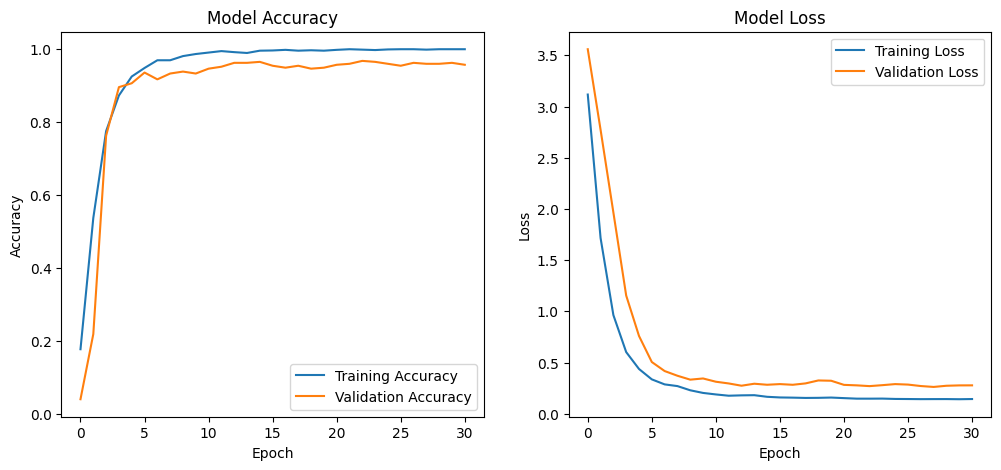

In [ ]:
# Function to plot the history
def plot_history(history):
    # Summarize history for accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'], label='Training Accuracy')
    plt.plot(history.history['val_acc'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

plot_history(history)

In [ ]:
# Predict the labels for your test data
test_generator.reset()  # Ensure the generator is at the start
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
confidence_scores = np.max(predictions, axis=1)

# Get the true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 948ms/step


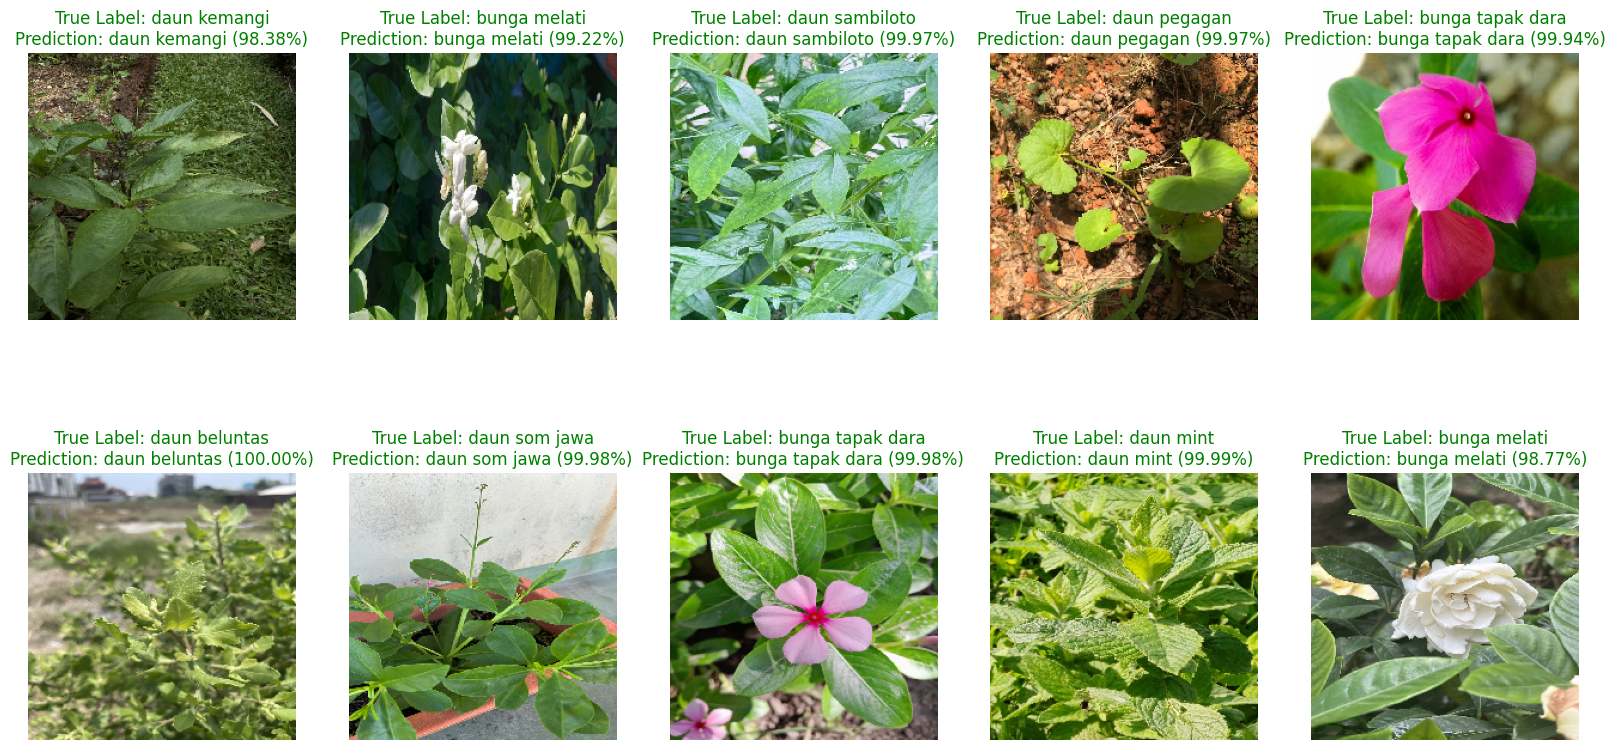

In [ ]:
# Function to plot random images with their true and predicted labels
def plot_random_images(generator, predictions, true_classes, class_labels, num_images=10):
    plt.figure(figsize=(20, 10))

    # Get all image file paths and corresponding labels
    all_images, all_labels = [], []
    for i in range(len(generator)):
        images, labels = generator[i]
        all_images.extend(images)
        all_labels.extend(labels)

    # Randomly select a subset of images
    indices = random.sample(range(len(all_images)), num_images)
    selected_images = [all_images[i] for i in indices]
    selected_true_labels = [all_labels[i] for i in indices]
    selected_pred_labels = [predictions[i] for i in indices]
    selected_confidence_scores = [confidence_scores[i] for i in indices]

    for i in range(num_images):
        # Get the true and predicted label for this image
        true_label = class_labels[np.argmax(selected_true_labels[i])]
        predicted_label = class_labels[selected_pred_labels[i]]
        confidence_score = selected_confidence_scores[i]

        # Set the title color: green if correct, red if wrong
        title_color = 'green' if true_label == predicted_label else 'red'

        # Plot the image
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(selected_images[i])
        plt.title(f'True Label: {true_label}\nPrediction: {predicted_label} ({confidence_score:.2%})', color=title_color)
        plt.axis('off')

    plt.show()

# Plot 10 random images from test set
plot_random_images(test_generator, predicted_classes, true_classes, class_labels, num_images=10)

In [ ]:
# Mendapatkan nama file dari test_generator
test_image_filenames = test_generator.filenames

# Membuat list untuk menyimpan hasil
results = []

# Iterasi melalui prediksi, label sebenarnya, dan nama file
for i in range(len(true_classes)):
    filename = test_image_filenames[i]
    true_label_index = true_classes[i]
    predicted_label_index = predicted_classes[i]
    confidence = confidence_scores[i]

    # Mendapatkan nama label asli dan prediksi dari indeks
    true_label = class_labels[true_label_index]
    predicted_label = class_labels[predicted_label_index]

    # Menambahkan hasil ke dalam list
    results.append({
        'Nama File': filename,
        'Label Asli': true_label,
        'Hasil Prediksi': predicted_label,
        'Confidence Score': confidence
    })

df_results = pd.DataFrame(results)

# Tampilkan seluruh DataFrame
# Untuk dataset yang sangat besar, ini mungkin menampilkan banyak baris.
# Anda bisa membatasi tampilan jika perlu (misal: df_results.head() atau df_results.tail())
print(df_results)

                                             Nama File      Label Asli  \
0    /content/main/test_images/daun pegagan/daun pe...    daun pegagan   
1    /content/main/test_images/daun pegagan/daun pe...    daun pegagan   
2    /content/main/test_images/daun pegagan/daun pe...    daun pegagan   
3    /content/main/test_images/daun pegagan/daun pe...    daun pegagan   
4    /content/main/test_images/daun pegagan/daun pe...    daun pegagan   
..                                                 ...             ...   
370  /content/main/test_images/daun teh hijau/daun ...  daun teh hijau   
371  /content/main/test_images/daun teh hijau/daun ...  daun teh hijau   
372  /content/main/test_images/daun teh hijau/daun ...  daun teh hijau   
373  /content/main/test_images/daun teh hijau/daun ...  daun teh hijau   
374  /content/main/test_images/daun teh hijau/daun ...  daun teh hijau   

     Hasil Prediksi  Confidence Score  
0      daun pegagan          0.999727  
1      daun pegagan          0.

In [ ]:
# Save the DataFrame to a CSV file
df_results.to_csv('prediction_results.csv', index=False)

# Download the CSV file
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Mendapatkan daftar nama file dari test_generator
test_image_filenames = test_generator.filenames

# Membuat list untuk menyimpan nama file citra yang salah diprediksi
wrong_predictions_filenames = []

# Iterasi melalui prediksi dan label sebenarnya
for i in range(len(true_classes)):
    # Membandingkan label sebenarnya dengan label yang diprediksi
    if true_classes[i] != predicted_classes[i]:
        # Jika prediksi salah, tambahkan nama file ke dalam list
        wrong_predictions_filenames.append(test_image_filenames[i])

# Mencetak nama file citra yang salah diprediksi
print("Nama file citra yang salah diprediksi:")
for filename in wrong_predictions_filenames:
    print(filename)

Nama file citra yang salah diprediksi:
/content/main/test_images/daun sambiloto/daun sambiloto-21.jpg
/content/main/test_images/bunga mawar/bunga mawar-35.jpg
/content/main/test_images/daun jambu biji/daun jambu biji-18.jpeg
/content/main/test_images/daun jambu biji/daun jambu biji-21.jpeg
/content/main/test_images/daun som jawa/daun som jawa-88.jpg
/content/main/test_images/daun som jawa/daun som jawa-29.jpg
/content/main/test_images/bunga kembang sepatu/bunga kembang sepatu-3.jpeg
/content/main/test_images/daun kumis kucing/kumis kucing-55.jpg
/content/main/test_images/daun kemangi/daun kemangi-7.jpeg


                      precision    recall  f1-score   support

      bunga kecubung       1.00      1.00      1.00        15
bunga kembang sepatu       0.93      0.93      0.93        15
 bunga kembang tidur       1.00      1.00      1.00        15
       bunga kenanga       1.00      1.00      1.00        15
         bunga mawar       1.00      0.93      0.97        15
        bunga melati       0.94      1.00      0.97        15
       bunga rosella       1.00      1.00      1.00        15
    bunga tapak dara       1.00      1.00      1.00        15
        bunga telang       1.00      1.00      1.00        15
       daun beluntas       1.00      1.00      1.00        15
     daun jambu biji       1.00      0.87      0.93        15
          daun kelor       1.00      1.00      1.00        15
        daun kemangi       0.88      0.93      0.90        15
   daun kumis kucing       1.00      0.93      0.97        15
           daun mint       0.88      1.00      0.94        15
       

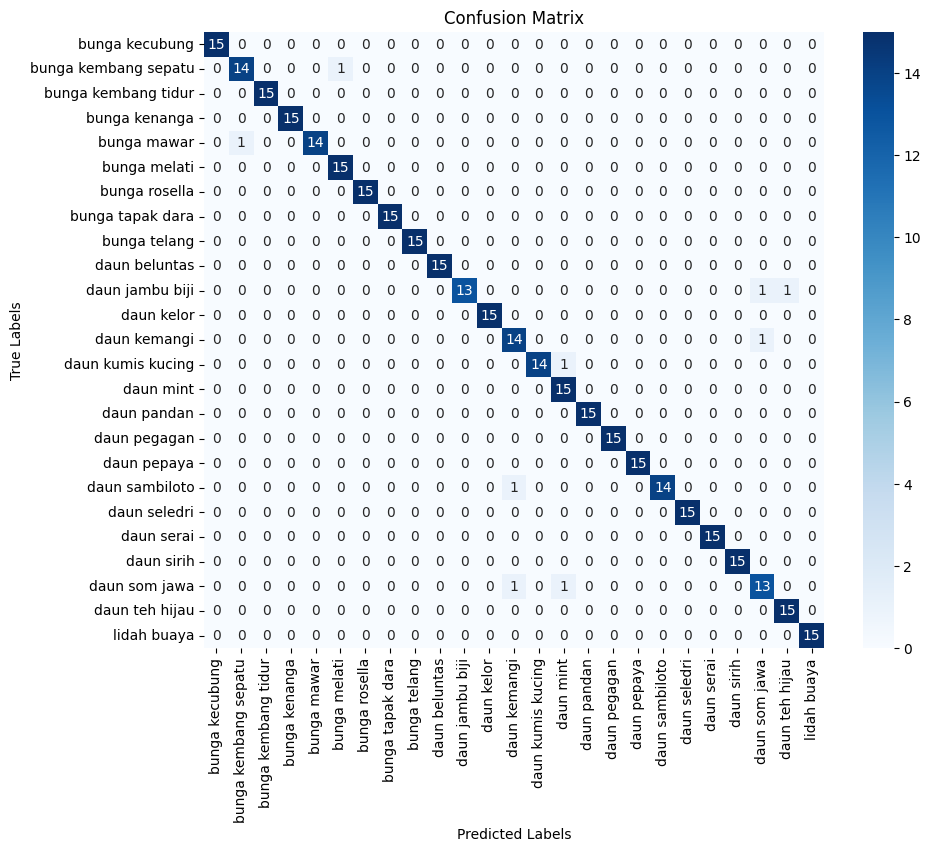

In [ ]:
# Generate and display the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
model.save('Tanaman-obat-keluarga_ConvNeXtbase_97.h5')

savedmodel_dir = "saved_model/convnext_final"
model.export(savedmodel_dir)

zip_path = "convnext_savedmodel.zip"
shutil.make_archive("convnext_savedmodel", 'zip', savedmodel_dir)

Saved artifact at 'saved_model/convnext_final'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 25), dtype=tf.float32, name=None)
Captures:
  133151133358544: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  133151133358352: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  133151133359120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133151133362192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133151133359696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133151133362000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133151133362384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133151133363536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133151133361616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133151133360848: TensorSpec(shape=(), dtype=tf.resource

'/content/convnext_savedmodel.zip'

In [ ]:
# !pip install tensorflowjs

# !tensorflowjs_converter --input_format keras Tanaman-obat_ConvNeXt.h5 tfjs_model

# Convert the Keras model to a TensorFlow Lite model
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT] # dynamic range quantization
# tflite_model = converter.convert()

# # Save the TensorFlow Lite model to a file
# with open('Tanaman-obat-keluarga_ConvNeXtbase_95.tflite', 'wb') as f:
#     f.write(tflite_model)

converter = tf.lite.TFLiteConverter.from_saved_model(savedmodel_dir)
# Tidak pakai optimizations agar akurasi maksimal
# converter.optimizations = [tf.lite.Optimize.DEFAULT] ← JANGAN aktifkan
tflite_model = converter.convert()

tflite_path = "model_convnext_final.tflite"
with open(tflite_path, "wb") as f:
    f.write(tflite_model)

In [ ]:
# h5_path = 'Tanaman-obat-keluarga_ConvNeXtbase_95.h5'

# # Download the specified file
# files.download(h5_path)
h5_path =  'Tanaman-obat-keluarga_ConvNeXtbase_97.h5'

# Download the specified file
files.download(h5_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# tflite_path ='Tanaman-obat-keluarga_ConvNeXtbase_95.tflite'

# # Download the specified file
# files.download(tflite_path)
files.download(tflite_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Konversi ulang model SavedModel ke float16 TFLite
converter_fp16 = tf.lite.TFLiteConverter.from_saved_model(savedmodel_dir)
converter_fp16.optimizations = [tf.lite.Optimize.DEFAULT]
converter_fp16.target_spec.supported_types = [tf.float16]
tflite_fp16_model = converter_fp16.convert()

# Simpan model float16
tflite_fp16_path = "model_convnext_final_fp16.tflite"
with open(tflite_fp16_path, "wb") as f:
    f.write(tflite_fp16_model)

files.download(tflite_fp16_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving daun jambu biji-56.jpg to daun jambu biji-56.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


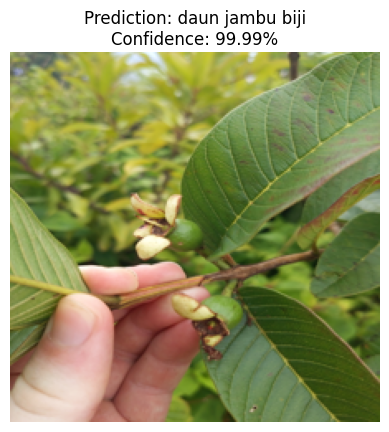

In [ ]:
from tensorflow.keras.preprocessing import image

# Upload the image file
uploaded = files.upload()

for fn in uploaded.keys():
  # Load the image
  img_path = fn
  img = PILImage.open(img_path).convert('RGB')

  # Resize the image to the target size (224x224 for this model)
  img = img.resize(image_size)

  # Convert the image to a numpy array and expand dimensions
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)

  # Preprocess the image (normalize pixel values)
  # Make sure the preprocessing matches the training data preprocessing
  img_array = img_array / 255.0

  # Make a prediction
  predictions = model.predict(img_array)

  # Get the predicted class index and confidence score
  predicted_class_index = np.argmax(predictions, axis=1)[0]
  confidence_score = np.max(predictions, axis=1)[0]

  # Get the predicted class label using the index_to_class mapping
  predicted_label = index_to_class[predicted_class_index]

  # Display the image and prediction
  plt.imshow(img)
  plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence_score:.2%}")
  plt.axis('off')
  plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Calculate TP, TN, FP, FN for each class
# Note: For multi-class classification, TP, TN, FP, FN are calculated for each class
# in a One-vs-Rest (OvR) manner.

# iterate through each class to get values
num_classes = conf_matrix.shape[0]
for i in range(num_classes):
    # True Positives (TP): The number of instances of class i correctly predicted as class i
    TP = conf_matrix[i, i]

    # False Positives (FP): The number of instances of other classes incorrectly predicted as class i
    FP = conf_matrix[:, i].sum() - TP

    # False Negatives (FN): The number of instances of class i incorrectly predicted as other classes
    FN = conf_matrix[i, :].sum() - TP

    # True Negatives (TN): The number of instances of other classes correctly predicted as other classes
    TN = conf_matrix.sum() - (TP + FP + FN)

    print(f"Metrics for class '{class_labels[i]}':")
    print(f"  TP: {TP}")
    print(f"  FP: {FP}")
    print(f"  FN: {FN}")
    print(f"  TN: {TN}")
    print("-" * 20)


# Generate and print the classification report
# This report includes precision, recall, f1-score, and support for each class,
# as well as overall accuracy, macro average, and weighted average.
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("\nClassification Report:")
print(report)

# Calculate overall accuracy from the confusion matrix
overall_accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
print(f"\nOverall Accuracy (from confusion matrix): {overall_accuracy:.4f}")

# Calculate Specificity for each class
print("\nSpecificity for each class:")
for i in range(num_classes):
    TP = conf_matrix[i, i]
    FP = conf_matrix[:, i].sum() - TP
    FN = conf_matrix[i, :].sum() - TP
    TN = conf_matrix.sum() - (TP + FP + FN)
    # Specificity = TN / (TN + FP)
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    print(f"  '{class_labels[i]}': {specificity:.4f}")

Metrics for class 'bunga kecubung':
  TP: 15
  FP: 0
  FN: 0
  TN: 360
--------------------
Metrics for class 'bunga kembang sepatu':
  TP: 14
  FP: 1
  FN: 1
  TN: 359
--------------------
Metrics for class 'bunga kembang tidur':
  TP: 15
  FP: 0
  FN: 0
  TN: 360
--------------------
Metrics for class 'bunga kenanga':
  TP: 15
  FP: 0
  FN: 0
  TN: 360
--------------------
Metrics for class 'bunga mawar':
  TP: 14
  FP: 0
  FN: 1
  TN: 360
--------------------
Metrics for class 'bunga melati':
  TP: 15
  FP: 1
  FN: 0
  TN: 359
--------------------
Metrics for class 'bunga rosella':
  TP: 15
  FP: 0
  FN: 0
  TN: 360
--------------------
Metrics for class 'bunga tapak dara':
  TP: 15
  FP: 0
  FN: 0
  TN: 360
--------------------
Metrics for class 'bunga telang':
  TP: 15
  FP: 0
  FN: 0
  TN: 360
--------------------
Metrics for class 'daun beluntas':
  TP: 15
  FP: 0
  FN: 0
  TN: 360
--------------------
Metrics for class 'daun jambu biji':
  TP: 13
  FP: 0
  FN: 2
  TN: 360
-----

In [ ]:
# Load labels.txt
with open("labels.txt", "r") as f:
    label_list = [line.strip() for line in f.readlines()]
label_to_index = {label: idx for idx, label in enumerate(label_list)}

# Load TFLite model (float16)
interpreter = tf.lite.Interpreter(model_path="model_convnext_final_fp16.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']

# Tracking akurasi
total = 0
correct = 0

for _, row in tqdm(test_df.iterrows(), total=len(test_df)):
    # 1. Baca & preprocess gambar
    img = PILImage.open(row['image_path']).convert('RGB')
    img = img.resize((224, 224))
    img_array = np.array(img).astype(np.float32) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 224, 224, 3)

    # 2. Inference pakai model float16
    interpreter.set_tensor(input_details[0]['index'], img_array)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])

    predicted_index = np.argmax(output)
    true_index = label_to_index[row['label']]

    # 3. Cek benar atau salah
    if predicted_index == true_index:
        correct += 1
    total += 1

# 4. Hitung akurasi
accuracy = correct / total
print(f"Akurasi float16 model: {accuracy:.4f} ({accuracy*100:.2f}%)")

100%|██████████| 375/375 [03:40<00:00,  1.70it/s]

Akurasi float16 model: 0.9760 (97.60%)
